# Why I'm in love with Julia

<img style="float: right;" width=50% src="images/JuliaLogo.png"/>

 ## An ode to dynamic dispatch

In [8]:
import csv, urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from numpy import * 
from numpy.random import *
plt.rcParams.update({'font.size': 22})

In [9]:
using BenchmarkTools
using Distributed
using CUDA

## The Julia Language 

Created by Jeff Bezanson, Stefan Karpinski, Viral B. Shah, and Alan Edelman. 

Work began in 2009. Now on version 1.6!

Julia is:
* High-level
* Dynamic
* High-performance


Created by...

Work began in 2009, version 1.0 in 2018. Now on version 1.6.

Julia is a high-level, dynamic, high-performance programming language

Try to define what this means ... am not computer scientist ... please correct me

### High-Level

* Abstracts machine code
* Uses natural language constructs
* Python, Perl, Ruby, R, C(?), Fortran(?), ...

### Dynamic
* Variable types are not declared
* Features meta-programming, method/type extensions
* Syntax is concise and human-readable
* Python, Perl, Ruby, …

Dynamic languages are usually dynamically typed, this means variable types do not have to be declared, and are instead inferred at runtime - often by something called an interpreter. 

They commonly feature the use of meta-programming to extend method and type definitions. Essentially allowing the code to modify itself at runtime by adding new functions to existing variable types, and inheriting or sharing behaviour between types and methods.

Often this leads to more concise and more-easily readable code. It's usually considered advantageous for development, because it's simple to write and flexible for rapid prototyping and iterative improvements. 

Code written in dynamic languages is often re-used, because we can easily define abstract notions of types that are more widely applicable (think 200,000 Python packages). 

### High-Performance
* Fast and memory efficient
* Readily scalable
* Statically typed?
* C, Fortran, …

A high-performance language is one that is fast to execute, and is memory efficient. Programs are often written to be scalable, and often leverage parallel computing or multiprocessing methods, possibly on distributed computer systems.

We also generally tend to associate high performance with statically typed languages. C and Fortran are the two big high-performance languages, and both are about as static as it gets. It's a sort of generally accepted notion that, as features of a programming language, dynamicism and high-performance don't really get on...

<center><img src="images/decision.jpg"/></center>

## Static vs. Dynamic Typing

To explain why this is, we have to look at the difference between a dynamically typed language, and a statically typed language. I think the two that most people will be familiar with here are Fortran and Python, so we'll use those as case-studies and consider the procedure for performing something simple like integer addition.

In Fortran all the variable types are known ahead of time. The compiler can convert the code ahead of time into a native language the computer understands. Then, when the program runs, it sends an instruction to the computer to add two integers, and the CPU executes an internal method for integer addition.

In Python by comparison, the method is much more involved. Python (and other dynamic languages) are not compiled ahead of time. In fact, the types of all the variables isn't known until runtime, when the code is actually executed. At this point the interpreter gets a command to "perform addition on two variables". 

It then has to deduce the types of these variables, and perform some check that a method is defined for addition for the two variable types. Then the appropriate method can be compiled into machine code, and the CPU can finally perform the integer addition operation.

**Fortran**

1. "Perform integer addition on two integers"
3. CPU performs integer addition operation

**Python**

1. "Perform addition on two variables"
2. Deduce variable types
3. Perform checks (can I add these types?)
4. Compile function
5. CPU performs integer addition operation

## This Is So Slow!

When we define a function like this in Python, the computer has no knowledge of the type of the variable `n`, it could be anything! Even in this simple example, there are three different functions calls with six different arguments. There's a list of nine different 'things' the interpreter has to interpret before it can even compile the code!

We have no knowledge of the variable `n`, it could be *anything*!

In [ ]:
def randmatmul(n):
    A = rand(n,n)
    B = rand(n,n)
    return dot(A, B) 

These steps need to be performed for *every* variable for *every* operation.

> 3. Deduce variable types
> 4. Perform checks (can I add these types?)
> 5. Compile function

This is comuptationally expensive, and often memory inefficient.

The extra overhead required to figure out what to do here is computationally expensive. 

Often dealing with abstract types is memory inefficient.

# What about Julia?

So what about Julia? It claims to be dynamic *and* performant. Let's see if these claims hold any water.

## Is it Dynamic?

Simple syntax:

First of all, is it dynamic? Well it looks dynamic! In fact the syntax will look very familiar if you've used Python. Maybe this is on purpose - designed to make you feel at home. But it also has a few inklings of the high-performance languages we know and love, e.g `end` statement

In [5]:
function randmatmul(n)
  A = rand(n,n)
  B = rand(n,n)
  return  A*B
end

randmatmul (generic function with 1 method)

Looks like Python!

In [ ]:
def randmatmul(n):
    A = rand(n,n)
    B = rand(n,n)
    return numpy.dot(A, B) 

Easier than Fortran!

It's also definitely easier to learn and write than Fortran, and the statements are much more concise.

```
subroutine randmatmul(n, C)
integer, intent(in) :: n
real(dp), intent(out), allocatable :: C(:, :)
real(dp), allocatable :: A(:, :), B(:, :)
allocate(A(n, n), B(n, n), C(n, n))
call random_number(A)
call random_number(B)
call dgemm('N','N',n,n,n,1.0d0,A,n,B,n,0.0d0,C,n)
end subroutine
```

Behaves like a dynamic language

It behaves like a dynamic language too! We can mix integers and floats without declaring anything, and methods work on different types. Try some example snippets:

```
ones(5)

sum(ones(5))

sum(randmatmul(5))/length(randmatmul(5))
```

In [11]:
println("Hello World\n", 1 + 2.0)
sum((1, 2 ))

Hello World
3.0


3

## Is It Performant?

What about performance? Here's a list of times in milliseconds for routines that multiply two random matrices in various different languages. All the implementations are 'idiomatic', i.e using numpy for Python and LAPACK in Fortran. The underlying implementation in all these languages except Mathematica uses BLAS.

In [13]:
from IPython.display import HTML

In [15]:
HTML("""<video alt="test" width=100% controls> <source src="images/speed.mp4" type="video/mp4" autostart="false"></video>""")

### Very Performant!

Truth be told, I cherry-picked that data a bit. Matrix multiplication is actually where Julia does best. But I'm not being too deceptive, let's look at some other benchmarks, here we compare eight fairly typical computational procedures that you might find some analogous version of in scientific computing. 

The first thing we notice is that Matlab is very bad with strings. The second thing we notice is that Julia performs as well as C and Fortran, and is actually an order of magnitude faster than Fortran when dealing with strings and files. On that front, at least, Fortran could probably learn a thing or two from Julia.

So what's the key to Julia's success? And why haven't other languages done it?

`iteration_pi_sum` - calculate value of pi by summation

`matrix_multiply` - idiomatic matrix multiplication (e.g numpy for Python, all use BLAS except Mathematica)

`matrix_statistics` - calculate mean and std. dev. of random matrices

`parse_strings` - parse string as integer 1000 times

`print_to_file` - write 100,000 lines to file

`recursion_fibonacci` - lazy fibonacci sequence

`recursion_quicksort` - native implementation of quicksort algorithm

`userfunc_mandelbrot` - calculate mandelbrot set

In [ ]:
def plotbm():
    langs = ("r", "python", "matlab", "fortran", "julia", "c")
    response = urllib.request.urlopen('https://julialang.org/assets/benchmarks/benchmarks.csv')
    lines = [l.decode('utf-8') for l in response.readlines()]
    cr = csv.reader(lines)
    df = pd.DataFrame(cr)
    df = df.loc[df[0].isin(langs)]
    fig = plt.figure()
    fig.set_size_inches(12, 8)
    for test in df[1].unique():
        testres = df.loc[df[1] == test]
        res = [testres.loc[testres[0] == i][2].astype(float) for i in langs]
        plt.plot(langs, res, '.-', ms=20, lw=5, label=test)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.yscale("log")
    plt.grid(which='major', axis='y')
    return

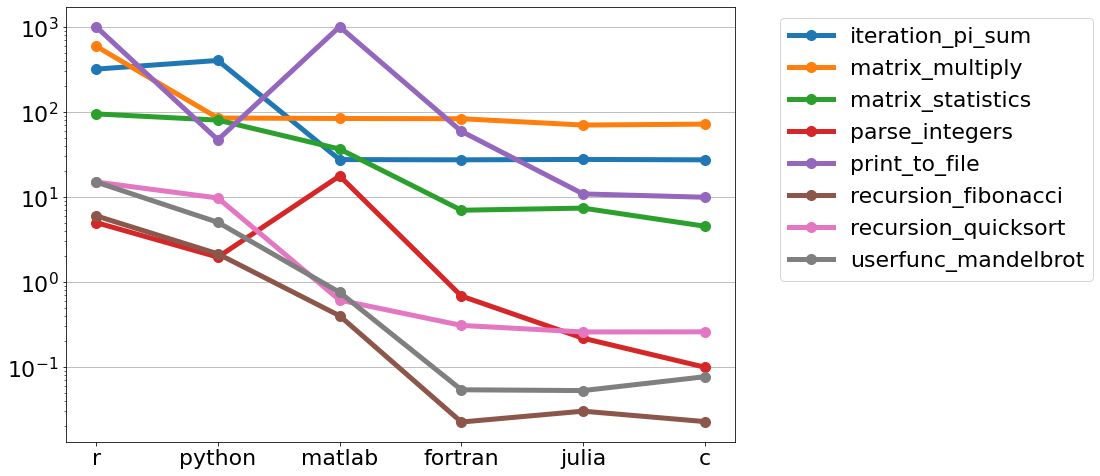

In [10]:
plotbm()

<center><img width=50% src="images/bean1.png"/><img width=46% src="images/bean2.png"/></center>

# Multiple Dispatch
## Julia's Programming Paradigm

The revolution at the heart of Julia is it's central programming paradigm: multiple dispatch. We've established that dynamic languages have many different definitions for functions and operations depending on the argument types that are given to those functions. At runtime, when the types become concrete, the correct method for those types is chosen - this is known as dispatching.

Static languages are "zero dispatch" - there is no choice of which method to use, because variables only have one type, and methods only accept fixed argument types.

Dynamic languages, particularly object-oriented languages like Python, are single dispatch. 

In a dynamic language functions and operations have multiple methods for different types

At runtime, when types are known, the correct method for the type is chosen

This is known as *dispatching*

Static languages are "zero dispatch"

Dynamic languages are usually single dispatch

### Single Dispatch Languages
* In single dispatch languages types have methods.
* Functions are dispatched to the type class of their first argument, e.g `add(1, 2.0) === 1.__add__(2.0)`
* Behaviour that depends on the type of subsequent arguments is determined using `if`-`else`
* This is how many dynamic languages, especially OOL work

In a single dispatch language functions are associated with types.

When you call a function with more than one argument, the function is *dispatched* to the first argument's type class

The type's method then determines how to treat the subsequent arguments depending on their types.

For example, if you call the `add` function on the variables `1` and `2.0`, the interpreter dispatches on the type of `1`, i.e the integer type. A series of `if`-`else` statements then determine how to add a float to the integer, by converting the integer to a float or vice versa.

Show examples of methods belonging to different types.

In [ ]:
import inspect
inspect.getmembers(1)[:5]

### Multiple Dispatch Languages
* Types do not have method properties
* Functions have multiple definitions for different combinations of types
* Functions are dispatched on the type of all arguments
* A lookup table determines the most specific valid method

In a multiple dispatch language, type classes do not have method properties. Instead, functions and operations like addition, subtraction, have multiple definitions for different combinations of argument types.

The function is then dispatched to the appropriate definition based on the types of *all* the arguments, and the correct method is determined via a lookup table.

Show examples of different method definitions for different types

In [ ]:
methods(+)

## How is Julia so fast?

So how does Julia *leverage* multiple dispatch to lend speed to a dynamic language?

We start by writing a function that accepts arguments with arbitrary types - like we would in Python. At runtime, when the function is called, the actual types of the arguments are known. 

Julia then analyses the individual operations inside the function and dispatches them based on the concrete types of all the variables. It then compiles a static version of the function for the specific argument types that were parsed when the function was called - this is known as 'just-ahead-of-time' compilation. Compared to Python's just-in-time compilation where only the individual operations are ever compiled. 

The static version of the function can be re-used when the function is called again with the same argument types, and because it is static, it achieves the same speed and memory efficiency as static languages like C or Fortran.

1. Write functions with arbitrary argument types

2. At runtime the argument types are known

3. Julia analyses the operations inside the function

4. Dispatch methods on concrete types of variables

5. Compile static version of the function

6. Re-use compiled code when function is called with the same types

### Just-ahead-of-time Compilation

Using the `@code_llvm` macro, we can inspect the statically compiled code for a given function or operation

Julia compiles the method code using the LLVM compiler, and the result is static code that is almost identical to the code you would get using C. 

We can show some examples to get a better idea of how this works using the LLVM macro, which prints out the static version of the function. The static code is specific to the combination of variable types we used. Compare the `int + int` and `int + float` methods shown here.

This also works for custom functions. We can write a toy function for computing the hypotenuse of a triangle using Pythagoras' theorem, and use `@code_llvm` to show how Julia compiles static code for the whole function.

```
function pythag(a, b)
    c2 = a^2 + b^2
    return sqrt(c2)
end

@code_llvm pythag(1, 2)
```

In [21]:
@code_llvm 1 + 2

;  @ int.jl:87 within `+'
; Function Attrs: uwtable
define i64 @"julia_+_1703"(i64 signext %0, i64 signext %1) #0 {
top:
  %2 = add i64 %1, %0
  ret i64 %2
}


In [22]:
@code_ llvm 1.0 + 2

;  @ promotion.jl:321 within `+'
; Function Attrs: uwtable
define double @"julia_+_1731"(double %0, i64 signext %1) #0 {
top:
; ┌ @ promotion.jl:292 within `promote'
; │┌ @ promotion.jl:269 within `_promote'
; ││┌ @ number.jl:7 within `convert'
; │││┌ @ float.jl:94 within `Float64'
      %2 = sitofp i64 %1 to double
; └└└└
;  @ promotion.jl:321 within `+' @ float.jl:326
  %3 = fadd double %2, %0
;  @ promotion.jl:321 within `+'
  ret double %3
}


# What's the Catch?

**There isn't one!**... but things to remember:

It all most seems too good to be true right? As far as I can tell, it isn't!

Actually the creators of Julia themselves have been quite suprised at how effective multiple dispatch with JAT compilation is. They gave a talk at the 2019 Julia conference titled "The unreasonable effectiveness of multiple dispatch"

### Idiomatic Programming

Julia's approach assumes functions are called with a limited combinations of types

In practice this is almost always true,
    $$ N_\text{type combinations} \ll N_\text{function calls}$$

The underlying assumption in Julia's multiple dispatch/JAT approach is that, even in a dynamic language, functions are usually called with a limited set of argument types.

In practice this is almost always true, especially when considering compute-intensive functions in scientific applications. Roughly quantify it by asking whether the number of type combinations we expect for a given function is significantly less than the number of function calls.

### Time to First Plot

The first function call is slower than subsequent calls

The code is re-compiled each time the program is run from scratch

Libraries available to preserve compiled code between Julia sessions

We can compile Julia into an executable if we want

Because Julia compiles a static version of a function the first time you call that function with a given combination of argument types, the first call of a function will always be slow

Because this is true every time you run a Julia session, the total runtime is always compile time + runtime, vs. a single compile for a static language

But there are libraries that will preserve compiled code between Julia sessions, which is good for development and debugging

And we can also compile Julia into an executable if we want, which is then as fast as traditional C or Fortran programs

### Type Stability

Julia can only compile a static version of the code if the function is type-stable.
* A method should always return the same type for a given pair of input types
* Avoid changing variable types in performance-critical functions

Julia specialises on concrete types at function barriers.

If these are unavoidable then place the performance-critical part in a separate function 

Julia can only compile static code for a function if that function is type stable. This essentially means that a method should always return the same variable type for a given pair of input types. 

So if calling a function with string argument returns an integer, it should always return an integer when a string is provided, regardless of the value of that string. For example, don't set the return variable type based on the length of the input string.

It is also best to avoid global variables, because global variable types can change at any time, and so Julia cannot compile a static version of the code.

If either of these things are necessary, then the performance-critical part of the function should be kernelised into a separate, type-stable function.

**Don't write this...**

To give an idea, think about this function for filling a vector of length `n` with the value `2`, where the type of `2` is randomly chosen to be either an `Int64` or a `Float64`.

Because the type of `a` cannot be determined until the function is actually run, Julia has to intepret this function dynamically, and cannot compile an efficient static version of the code.

In [ ]:
function strange_twos_nokernel(n)
   a = Vector{rand(Bool) ? Int64 : Float64}(undef, n)
   for i = 1:n
       a[i] = 2
   end
   return a
end

strange_twos_nokernel(5)

**Instead write this...**

If instead we separate the a so-called 'kernel function', Julia can compile an efficient static version of the function `fill_twos!`, even if the outer function has to be run dynamically.

This is because, by the time `fill_twos!` is run, they type of `a` has been determined, and Julia can dispatch on the concrete type - either `Int64` or `Float64`.

Writing modular functions like this also lends itself to more code re-use, as the function `fill_twos!` is now generic and can be used to fill any iterable with the value `2`.

e.g
```
a = Matrix{Float64}(undef, 10, 10)
fill_twos!(a)
a
```

In [ ]:
function fill_twos!(a)
   for i = eachindex(a)
       a[i] = 2
   end
end;

function strange_twos_kernel(n)
   a = Vector{rand(Bool) ? Int64 : Float64}(undef, n)
   fill_twos!(a)
   return a
end;

In [ ]:
n = 50000
@benchmark strange_twos_nokernel($n)

In [ ]:
@benchmark strange_twos_kernel($n)

# Julia is great!

**More than a language...**

<img style="padding-right: 50px" width=25% align="left" src="images/hm1.png"/>
<br>
<br>

* Call C and Fortran directly

In [ ]:
function compute_dot(DX::Vector{Float64}, DY::Vector{Float64})
    @assert length(DX) == length(DY)
    n = length(DX)
    incx = incy = 1
    product = ccall((:ddot_, "libLAPACK"),
                    Float64,
                    (Ref{Int32}, Ptr{Float64}, Ref{Int32}, Ptr{Float64}, Ref{Int32}),
                    n, DX, incx, DY, incy)
    return product
end

<img style="padding-right: 50px" width=25% align="left" src="images/hm2.png"/>
<br>
<br>

* Vectorisation is idiomatic

In [ ]:
function polynomial(x::Number)
    return 3*x^2 + 2*x + 1
end

xs = rand(5)
ys = polynomial.(xs)
print(xs, "\n", ys)

<img style="padding-right: 50px" width=25% align="left" src="images/hm3.png"/>
<br>
<br>

* Built-in multithreading

In [ ]:
a = zeros(5)
Threads.@threads for i = 1:5
   a[i] = Threads.threadid()
end
a

<img style="padding-right: 50px" width=25% align="left" src="images/hm4.png"/>
<br>
<br>

* Built-in GPU computing

In [ ]:
N = 10^5
x_d = CUDA.fill(1.0f0, N)
y_d = CUDA.fill(2.0f0, N)
function add_broadcast!(y, x)
    CUDA.@sync y .+= x
    return
end
@btime add_broadcast!($y_d, $x_d)

<img style="padding-right: 50px" width=25% align="left" src="images/hm5.png"/>
<br>
<br>

* Built-in multiprocessing and distributed computing

In [ ]:
nheads = @distributed (+) for i = 1:200000000
    Int(rand(Bool))
end

## The Julia Ecosystem

Julia has a REPL, debugger, and built-in package manager, with more than 4000 packages. 

In [ ]:
using Pkg
Pkg.add("LinearAlgebra")

### Maths and Physics
* `LinearAlgebra.jl` - Comprehensive dense linear algebra built on BLAS and LAPACK
* `SparseArray.jl` - Linear algebra for sparse arrays
* `Arpack.jl` - ARPACK routines for eigenvalue problems
* `Fermi.jl` - Quantum chemistry package (under development)
* `QuantumOptics.jl` - Inspired by MATLAB's Quantum Optics Toolbox and Python QuTiP
* `Dierckx.jl` - Spline fitting and interpolation
* `Optim.jl` + `LsqFit.jl` - Uni- and multi-variate optimisation, and least-squares fitting

### Machine Learning
* `SciML.jl` - Partial differential equations for ML and physics-informed NNs
* `Flux.jl` - Higher-level ML package (more like Keras?)
* `Turing.jl` - Bayesian inference and probabilistic programming
* `TensorFlow.jl` - Wrapper for using TensorFlow specifically
* `RandomForests.jl` - Random forests in Julia

### General Purpose
* `CSV.jl` - Fastest CSV parser in class, utilises Julia's multithreading
* `Plots.jl` - Comprehensive plotting functionality, similar to `matplotlib.pyp~lot`
* `PyCall.jl` - Call Python code in Julia
* `PackageCompiler.jl` - Persistent compilation, or compile to executable
* `DataFrames.jl` - Julia's version of `Pandas`
* `Pluto.jl` - Reactive notebook in native Julia

### Growing Exponentially

Cumulative Julia downloads have almost *doubled* in the last year! Most are using it for speed and performance. 
<table><tr>
<td><img width=100% src="images/Julia-Adoption.png"/> </td>
<td><img width=100% src="images/Julia-Features-Liked.png"/> </td>
</tr></table>